Working with Audio


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin 
import sounddevice as sd

In [2]:
(Fs, raw) = wavfile.read ("Adele.wav")
time_dom  = np.array(raw)

In [15]:
nqyuist_freq = Fs / 2.0
freq = 500 #Hz
filter_order = 1001
f = freq / nqyuist_freq
filter_kernel = firwin(filter_order, f, pass_zero=False)
filter_kernel /= np.sum(np.abs(filter_kernel))

con_time = np.convolve(time_dom, filter_kernel, mode = "same")

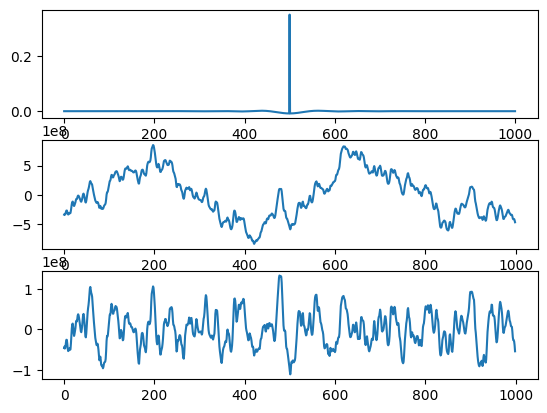

In [4]:
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])


plt.subplot(313)
plt.plot(con_time[2000:3000])
plt.show()

In [5]:
#wavfile.write("low_pass_filtered.wav", Fs, con_time.astype('int32'))

In [9]:
filter_order = 500
f_cutoff = 0.05
filter_kernel = firwin(filter_order, f_cutoff, window='hamming', pass_zero=True)
con_time = np.convolve(time_dom, filter_kernel, mode='same')

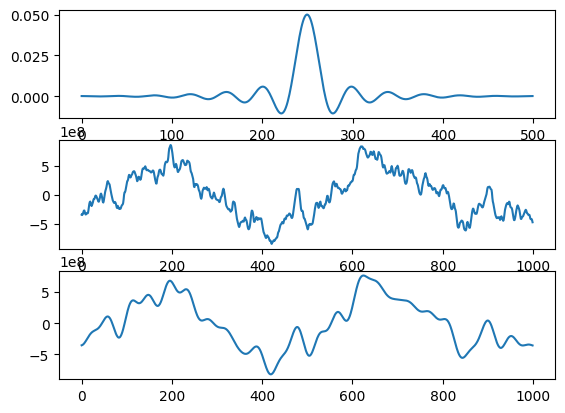

In [10]:
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])

plt.subplot(313)
plt.plot(con_time[2000:3000])
plt.show()

In [11]:
#wavfile.write("low_pass_filtered2.wav", Fs, con_time.astype('int32'))

In [12]:
filter_order = 10
f_cutoff = 0.12
filter_kernel = firwin(filter_order, f_cutoff, window='hamming', pass_zero=True)
con_time = np.convolve(time_dom, filter_kernel, mode='same')

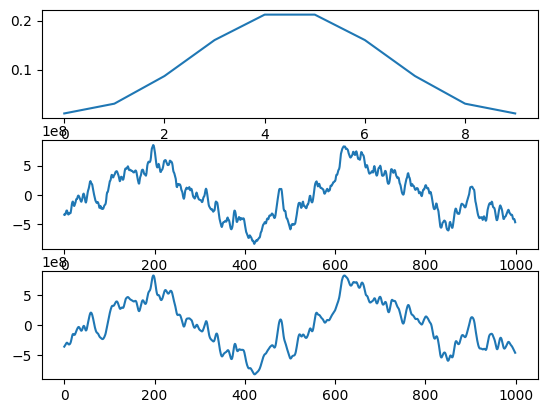

In [13]:
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])

plt.subplot(313)
plt.plot(con_time[2000:3000])
plt.show()

In [14]:
#wavfile.write("low_pass_filtered3.wav", Fs, con_time.astype('int32'))

In [16]:
nyquist_freq = Fs / 2.0
# Low-pass filter
freq_cutoff = 10000 # Hz
f = freq_cutoff / nyquist_freq
filter_order = 100
filter_type = 'lowpass'

# High-pass filter
freq_cutoff = 2000 # Hz
f = freq_cutoff / nyquist_freq
filter_order = 200
filter_type = 'highpass'

# Band-cut filter
freqs = [5000, 15000]
f = [freqs[0]/nyquist_freq, freqs[1]/nyquist_freq]
filter_order = 200
filter_type = 'bandpass'

if filter_type == 'lowpass':
    filter_kernel = firwin(filter_order, f, pass_zero=True)
elif filter_type == 'highpass':
    filter_kernel = firwin(filter_order, f, pass_zero=False)
elif filter_type == 'bandpass':
    filter_kernel = firwin(filter_order, f, pass_zero=False)

filter_kernel /= np.sum(filter_kernel)
con_time = np.convolve(time_dom, filter_kernel, mode="same")

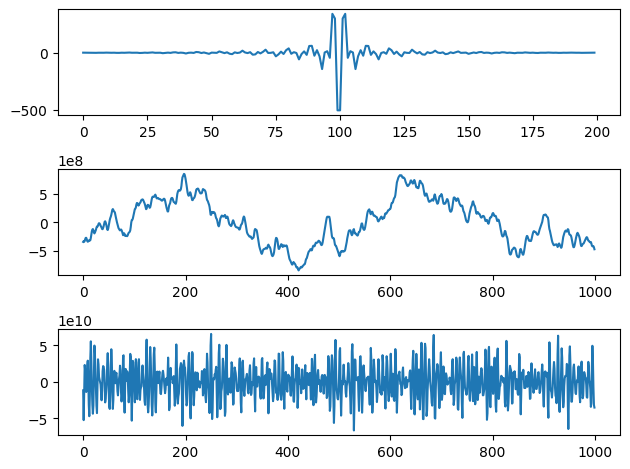

In [19]:
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])

plt.subplot(313)
plt.plot(con_time[2000:3000])

plt.tight_layout()
plt.show()

In [20]:
wavfile.write("out2.wav", Fs, con_time.astype('int32'))

l) Changing the frequency cutoff changes the filtered audio by removing more or less of the high-frequency content of the audio signal. For example, a higher frequency cutoff will remove more high-frequency content, resulting in a more filtered audio signal. The filter itself is also changed by adjusting the frequency cutoff, as the cutoff determines the point at which the filter starts to attenuate the signal.

M) The filter order determines the length of the filter kernel and how sharply the filter transitions between passbands and stopbands. A higher filter order results in a sharper transition but requires more computation. In this case, we recommended trying orders below 10k and 10 to avoid excessively long filter kernels and computation times.

N) High-pass filters allow high-frequency signals to pass through while attenuating low-frequency signals. Low-pass filters do the opposite, allowing low-frequency signals to pass through while attenuating high-frequency signals. Band-cut filters attenuate frequencies in the passband while allowing frequencies outside the passband to pass through. The passband is defined by the two cutoff frequencies, while the stopband is defined

In [6]:
filter_order = 1001
x = np.arange(-filter_order/2, filter_order/2)  
T = 100
filter_kernel = np.sin(2*np.pi/T*x)/x
filter_kernel /= np.sum(np.abs(filter_kernel))

con_time = np.convolve(time_dom, filter_kernel, mode = "same")

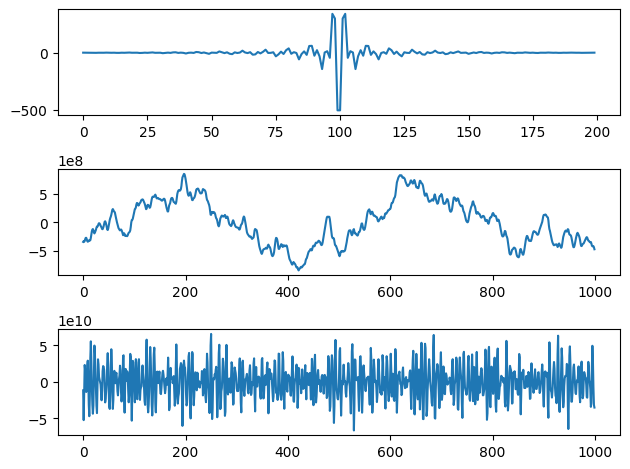

In [22]:
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])


plt.subplot(313)
plt.plot(con_time[2000:3000])
plt.tight_layout()
plt.show()

In [8]:
#wavfile.write("out.wav", Fs, con_time.astype('int32'))

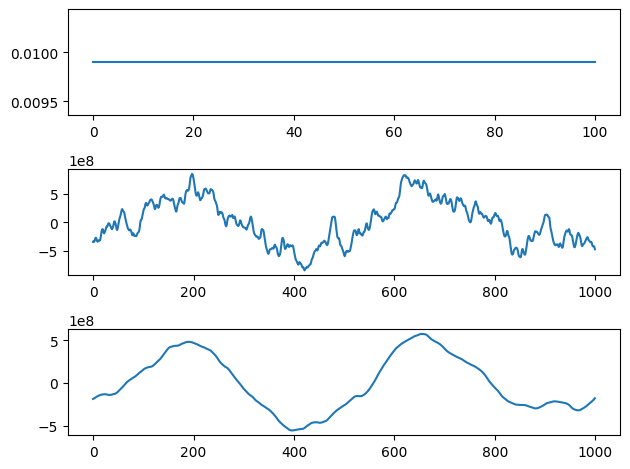

In [24]:
# Box filter
filter_order = 101
filter_kernel = np.ones(filter_order) / filter_order
con_time = np.convolve(time_dom, filter_kernel, mode='same')
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])

plt.subplot(313)
plt.plot(con_time[2000:3000])
plt.tight_layout()
plt.show()

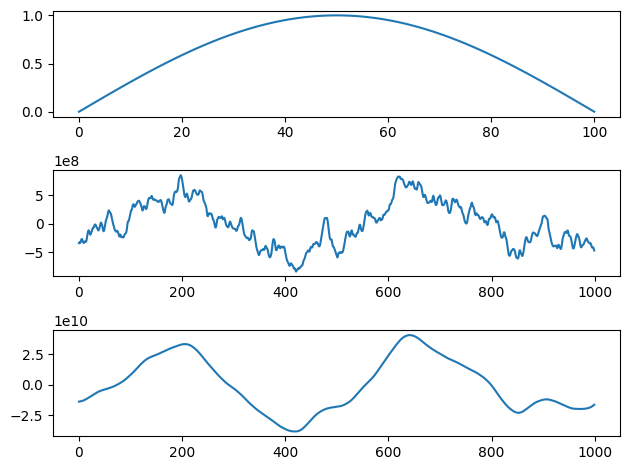

In [26]:
# Sin function filter
filter_order = 101
x = np.linspace(0, np.pi, filter_order)
filter_kernel = np.sin(x)
con_time = np.convolve(time_dom, filter_kernel, mode='same')
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])

plt.subplot(313)
plt.plot(con_time[2000:3000])
plt.tight_layout()
plt.show()

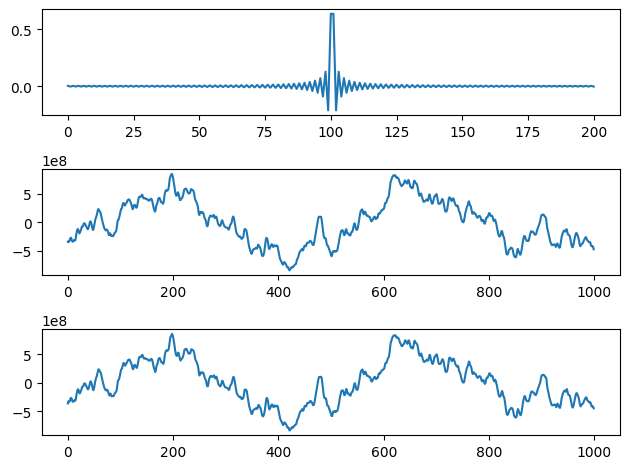

In [27]:
# Sinc function filter
filter_order = 201
x = np.arange(-filter_order/2, filter_order/2)  
filter_kernel = np.sinc(x)
con_time = np.convolve(time_dom, filter_kernel, mode='same')
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])

plt.subplot(313)
plt.plot(con_time[2000:3000])
plt.tight_layout()
plt.show()

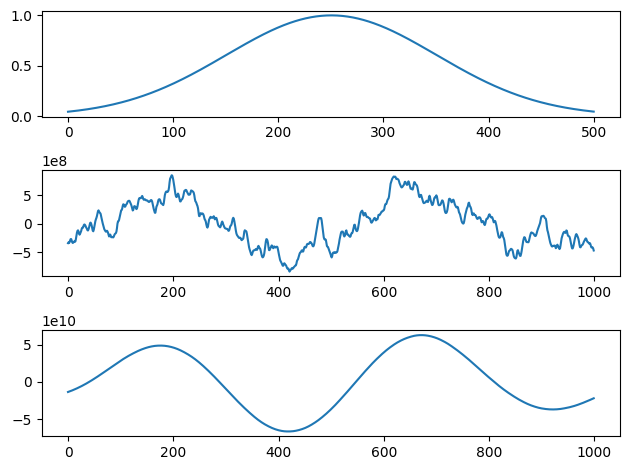

In [28]:
# Gaussian band-pass filter
filter_order = 501
mu = 0
sigma = 100
x = np.arange(-filter_order/2, filter_order/2)
filter_kernel = np.exp(-(x-mu)**2/(2*sigma**2)) * np.cos(2*np.pi*freq*x)
con_time = np.convolve(time_dom, filter_kernel, mode='same')
plt.subplot(311)
plt.plot(filter_kernel)

plt.subplot(312)
plt.plot(time_dom[2000:3000])

plt.subplot(313)
plt.plot(con_time[2000:3000])
plt.tight_layout()
plt.show()

The box filter and the sinc function filter are both low-pass filters, while the Gaussian band-pass filter is a band-pass filter.

The box filter has a rectangular frequency response, while the sinc function filter has a sinusoidal frequency response. The Gaussian band-pass filter has a bell-shaped frequency response.

The sin function filter has a frequency response similar to that of the sinc function filter, with a sinusoidal shape.

The box filter has a sharp cutoff, while the other filters have a more gradual transition from passband to stopband.

All filters attenuate frequencies above a certain cutoff, except for the band-pass filter, which only attenuates frequencies outside of the passband.

In [29]:
new_sample_rate_4 = 1000
sample_rate = 44100
time = 5
frames = sample_rate * time

rcd = sd.rec(frames, sample_rate, channels=1, dtype = "int32")
sd.wait()

new_sample_rate = sample_rate/2

In [30]:
#wavfile.write("rcd1.wav", sample_rate, rcd)

In [32]:
sd.play(rcd, new_sample_rate)
sd.wait()
Fs, data = wavfile.read("rcd1.wav")
time_dom = np.array(rcd)

In [35]:
freq_cutoff = 10000 # Hz
f = freq_cutoff / (Fs / 2.0)
filter_order = 100
time_dom = np.array(time_dom)
time_dom = time_dom.flatten()

filter_kernel = firwin(filter_order, f, pass_zero=True)
filter_kernel /= np.sum(filter_kernel)

con_time = np.convolve(time_dom, filter_kernel, mode = "same")


In [36]:
#wavfile.write("low_pass_rcd.wav", Fs, con_time.astype('int32'))

In [39]:
f1 = 1000  # Lower cutoff frequency
f2 = 4000  # Upper cutoff frequency
filter_order = 101

nyquist_freq = 0.5 * Fs
f1_norm = f1 / nyquist_freq
f2_norm = f2 / nyquist_freq
filter_kernel = firwin(filter_order, [f1_norm, f2_norm], pass_zero=False)

filter_kernel /= np.sum(filter_kernel)

con_time = np.convolve(time_dom, filter_kernel, mode="same")

In [40]:
#wavfile.write("high_pass_rcd.wav", Fs, con_time.astype('int32'))

In [41]:
Fs, data = wavfile.read("rcd1.wav")
sd.play(data, Fs)
sd.wait()

In [42]:
Fs, data = wavfile.read("low_pass_rcd.wav")
sd.play(data, Fs)
sd.wait()

In [43]:
Fs, data = wavfile.read("high_pass_rcd.wav")
sd.play(data, Fs)
sd.wait()